# 17. Unit 3. Lecture 8 Feedforward Neural Network

## 17.3. Motivation

Motivation to Neural Networks

So far, the ways we have performed non-linear classification involve either first mapping $x$ explicitly into some feature vectors $\phi(x)$ whose coordinates involve non-linear functions of $x$, or in order to increase computational efficiency, rewriting the decision rule in terms of a chosen kernel, i.e. the dot product of feature vectors, and then using the training data to learn a transformed classification parameter.

However, in both cases, the feature vectors are chosen . They are not learned in order to improve performance of the classification problem at hand.

Neural networks, on the other hand, are models in which the feature representation is learned jointly with the classifier to improve classification performance.

#### Note

Consider the classification decision rule:

$$..$$

where  represent input data and  is the corresponding predicted labels, and we have omitted the bias/offset term for simplicity.

The output of feature map $\phi(x)$ is a vector that is not necessarily and often not of the same dimension of the input $x$.  

For example, consider $..$, and $..$ a quadratic feature map $..$.

The classification parameter $\theta$ must of the same dimension of the feature vectors $\phi(x)$ for the dot product $\theta \cdot \phi(x)$ to make sense.


## 4. Neural Network Unit

A neural network unit is a primitive neural network that consists of only the “input layer", and an output layer with only one output. It is represented pictorially as follows:

* Input Layer $ x = [x_1, x_2, .., x_d] $
* Weights $ w = [w_1, w_2, .., w_d]^T $
* $ z = w_0 + \sum_{i}^d x_iw_i $  
  $ z = w_0 + x \cdot w $
* $ \hat{y} = f(z) $  
* $f$: the activation function
  

### 4. (a) Numerical Example - Neural Network Unit

In [2]:
import numpy as np

In [3]:
def z(x,w,w_0):
    return np.dot(x,w) + w_0

w_0 = -3
w = np.array([1,-1])
x = np.array([1,0])

In [4]:
print( x, w, w_0)

[1 0] [ 1 -1] -3


In [5]:
z(x,w,w_0)

-2

### 4. (b) Hyperbolic Tangent Activation Function

$$ tanh(x) = { e^x - e^{-x} \over e^x + e^{-x} } = 1 - {2 \over e^{2z} + 1}$$

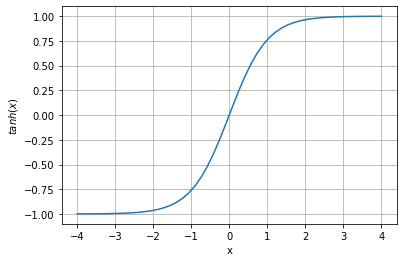

In [11]:
# plotting tanh(x)
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-4,4)
plt.plot(x, np.tanh(x))

plt.grid()
plt.xlabel("x")
plt.ylabel("$tanh(x)$")

plt.show()

* the domain of tanh(x) is $\R$
* the range of tanh(x) is ]-1,+1[
* tanh(0) = 0
* tanh is odd

In [8]:
np.tanh(0)

0.0

## 5. Introduction to Deep Neural Networks
Introduction and Motivation to Deep Neural Networks

A deep (feedforward) neural network refers to a neural network that contains not only the input and output layers, but also hidden layers in between. For example, below is a deep feedfoward neural network of 2 hidden layers, with each hidden layer consisting of 5 units:

* Layers
  1 Input layer
  0-many Hidden layers
  1 Output layer
* Width of a layer (number of nodes)
* Depth of a NN (number of layers)

The initial few layers of a neural networks typically capture the simpler and smaller features whereas the later layers use information from these low-level features to identify more complex and sophisticated features.

Why now?

* Lots of data
* Comoputational ressources
* large models are easier to train
* flexible neural "lego pieces"

### 5. (a) Representation Power of Neural Networks: 1



In these two problems, we are going to explore how a neural network can represent any given binary functions. We will start in this problem by building the logic NAND function using a simple neural network.

The logic NAND function is defined as $ y = NOT ( x_1\ AND\ x_2 ) $

In [16]:
x = np.array([(0,0), (0,1), (1,0), (1,1)])
y = np.array([(1),(1),(1),(0)])
print(x,y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [1 1 1 1]


In [22]:
def z(x, w_0, w_1, w_2):
    z = np.array([w_1,w_2])
    return np.dot(x,z) + w_0
def u(z):
    if z <= 0:
        return 0
    else:
        return 1

np.vectorize(u)(z(x, 2, -1, -1))

array([1, 1, 1, 0])

### 5. (b) Representation Power of Neural Networks: 2

## 6. Hidden Layer Models

In [42]:
x1 = [-1,-1]
x2 = [ 1,-1]
x3 = [-1, 1]
x4 = [ 1, 1]
X = [x1, x2, x3, x4]
Y = [1, -1, -1, 1]

def f(z):
    return 2*z -3

def f12(x_i, w01, w02, w11, w21, w12, w22):
    f1 = f( w01 + w11 * x_i[0] + w21 * x_i[1])
    f2 = f( w02 + w12 * x_i[0] + w22 * x_i[1])
    return f1, f2



In [43]:
Q1 = ( 0, 0, 0, 0, 0, 0)
Q2 = ( 1, 1, 2, 2,-2,-2)
Q3 = ( 1, 1,-2,-2, 2, 2)
Q = [Q1, Q2, Q3]

print(f12(X[3], *Q2))

P = []
for q in Q:
    X1, X2 = [], []
    for x in X:
        x1 , x2 = f12(x, *q)
        X1.append(x1)
        X2.append(x2)
    P.append([X1, X2])

print(P)



(7, -9)
[[[-3, -3, -3, -3], [-3, -3, -3, -3]], [[-9, -1, -1, 7], [7, -1, -1, -9]], [[7, -1, -1, -9], [-9, -1, -1, 7]]]


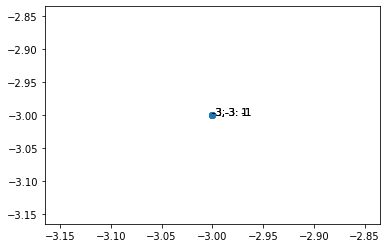

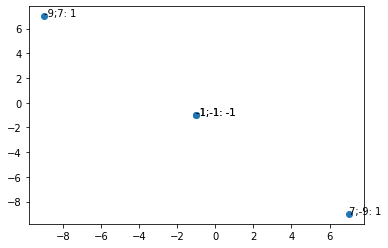

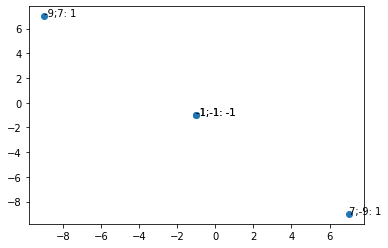

In [45]:
import matplotlib.pyplot as plt

for i, p in enumerate(P):
    fig, ax = plt.subplots()
    ax.scatter(*p)
    for j, pts in enumerate(list(zip(p[0], p[1]))):
        ax.annotate( str(pts[0]) + ";" + str(pts[1]) + ": " + str(Y[j]), (pts[0], pts[1]))

    plt.show()